### **直方图的绘制**

In [33]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [34]:
# 设定bins的数目
bins = np.arange(256).reshape(256, 1)

In [35]:
def draw_grey_histogram(image):
    # 创建一个全0矩阵来绘制直方图
    new = np.zeros((image.shape[0], 256, 3))
    # 对图像进行直方图计算
    hist_item = cv.calcHist([image], [0], None, [256], [0, 256])
    # 对直方图进行归一化
    cv.normalize(hist_item, hist_item, 0, 255, cv.NORM_MINMAX)
    hist = np.int32(np.around(hist_item)) # 取整操作
    for x, y in enumerate(hist):
        cv.line(new, (x, 0), (x, y), (255, 255, 255))
    # 由于从顶部开始绘制，因此需要将矩阵进行翻转
    result = cv.flip(new, 0)
    return result

In [36]:
def draw_bgr_histogram(image):
    # 创建一个3通道的全0矩阵以绘制直方图
    new = np.zeros((image.shape[0], 256, 3))
    # 声明BGR三种颜色
    bgr = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
    for i, col in enumerate(bgr):
        hist_item = cv.calcHist([image], [i], None, [256], [0, 256])
        cv.normalize(hist_item, hist_item, 0, 255, cv.NORM_MINMAX)
        hist = np.int32(np.around(hist_item)) # 取整操作
        # 将归一化后的矩阵和灰度值矩阵按列合并
        hist = np.int32(np.column_stack((bins, hist)))
        # False表示不绘制多边形
        cv.polylines(new, [hist], False, col)
    result = cv.flip(new, 0)
    return result

In [37]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'flower.jpg')
if img is None:
    print('Failed to read flower.jpg')
    sys.exit

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


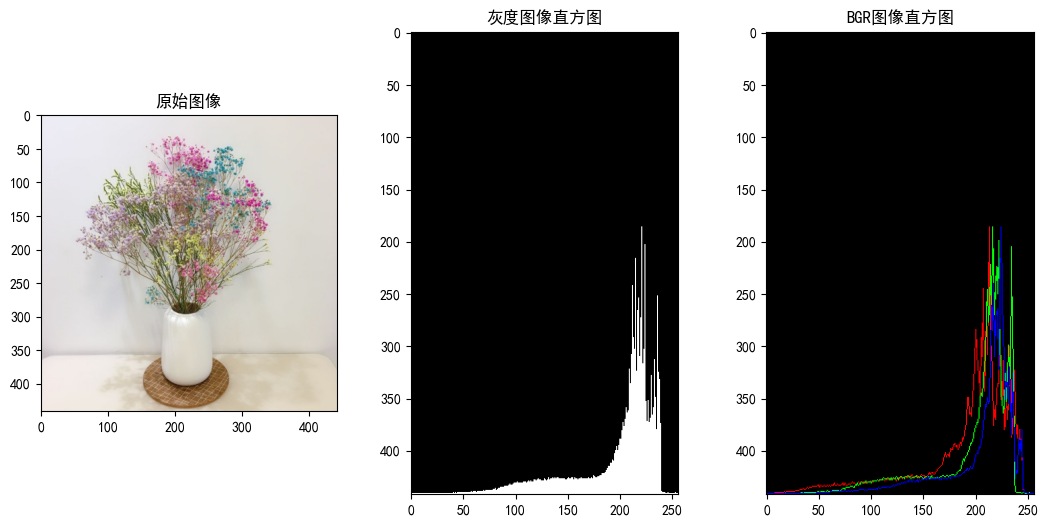

In [38]:
# 将图片转换为灰度图像
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 计算并绘制灰度图像的直方图和BGR图像的直方图
gray_histogram = draw_grey_histogram(gray)
bgr_histogram = draw_bgr_histogram(img)
plt.figure(figsize=(13,6))
plt.subplot(1, 3, 1)
plt.title('原始图像')
plt.imshow(img[:, :, [2, 1, 0]])
plt.subplot(1, 3, 2)
plt.title('灰度图像直方图')
plt.imshow(gray_histogram)
plt.subplot(1, 3, 3)
plt.title('BGR图像直方图')
plt.imshow(bgr_histogram)